## This is a Detailed Example Very Similar to the Hands On Assignment for DS106ModelingL2 - Enjoy!

### Install Packages & Load Libraries

In [65]:
#If you have never used a package before you will need to install it first before running it as a library
install.packages("popbio")


The downloaded binary packages are in
	/var/folders/gf/j9_tr6ys3w9f12nqzsftsrth0000gn/T//Rtmp41BcFS/downloaded_packages


In [56]:
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(lmtest))
suppressPackageStartupMessages(library(popbio))
suppressPackageStartupMessages(library(e1071))
#the above code suppressPackageStartupMessages(library(package_name_here)) is lovely and takes away those annoying
#pink messages! Pink is a great color to wear, but annoying in code!!

In [59]:
# Importing data using this relative path meaning it will work on anyone's computer with the data in the Data folder
minerals = read.csv('../Data/minerals.csv')

In [60]:
#the head() code will allow you to see the first few rows of your data so you can see the spelling of the columns!
head(minerals)

,Antimony,Gold
,<dbl>,<int>
1,3.08,1
2,6.15,1
3,2.35,1
4,0.30,0
5,0.30,0
6,9.62,1


In [58]:
### Below the dataset name and columns are being changed to prevent copy and pasting for the assignment :) 
### So keep in mind this is a made up example :)
### For this example below imagine the Radon column is indicating the presence of radon and 
### the Toxicity_Levels are indicating the amount of toxicity as we know radon causes damage to a person's health!

In [5]:
colnames(minerals)[1] <- "Toxicity_Levels"
colnames(minerals)[2] <- "Radon"
Metals = minerals
head(Metals)

,Toxicity_Levels,Radon
,<dbl>,<int>
1,3.08,1
2,6.15,1
3,2.35,1
4,0.30,0
5,0.30,0
6,9.62,1


In [6]:
# I wanted to look at the values in the data for Toxicity_Levels
table(Metals$Toxicity_Levels)


 0.1  0.2 0.22  0.3 0.31 0.32 0.39  0.4 0.41 0.42 0.43  0.5 0.51 0.52 0.53 0.56 
   4    4    3    6    1    1    1    2    2    1    1    1    1    1    1    1 
 0.6  0.7  0.8 0.91 1.11  1.2 1.21 1.22 1.43 1.82 1.92 2.14  2.3 2.35 2.47 2.54 
   1    1    1    1    3    1    1    1    1    1    1    1    1    1    1    1 
3.08 3.19  3.5 3.71 4.12 4.22 4.32 4.99  5.6 6.15 6.32 8.32 8.45 9.62 18.2 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 

In [61]:
### Recoding our DV since it must be binary
Metals$Toxicity_LevelsR <- NA
Metals$Toxicity_LevelsR[Metals$Toxicity_Levels<1] <- 0
Metals$Toxicity_LevelsR[Metals$Toxicity_Levels>=1] <- 1
#I chose to say anything under 1 = 0 and every value over 1 = 1 for Toxicity_Levels

In [8]:
### After the recode above let's look at the data to see our new column of Toxicity_LevelsR with the values that
### are less than 1 = 0 and the values that are greater than 1 = 1
head(Metals)

,Toxicity_Levels,Radon,Toxicity_LevelsR
,<dbl>,<int>,<dbl>
1,3.08,1,1
2,6.15,1,1
3,2.35,1,1
4,0.30,0,0
5,0.30,0,0
6,9.62,1,1


In [9]:
### You see our recode was successful!

### Creating base model

In [12]:
#here we are calling our model: Model
#glm is the function
#Toxicity_LevelsR is our DV recoded column from above
#Radon is our IV
#Metals is our dataset
#family= "binomial" because we are doing Binomial Logistic Regression
Model = glm(Toxicity_LevelsR ~ Radon, data = Metals, family = binomial)
summary(Model)


Call:
glm(formula = Toxicity_LevelsR ~ Radon, family = binomial, data = Metals)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2974  -0.4172  -0.4172   0.3850   2.2293  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.3979     0.6030  -3.976 6.99e-05 ***
Radon         4.9628     0.9498   5.225 1.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 88.160  on 63  degrees of freedom
Residual deviance: 35.062  on 62  degrees of freedom
AIC: 39.062

Number of Fisher Scoring iterations: 5


### Data Wrangling, the Radon column is already coded to 1 and 0 so no need to recode anything for that
### We will move on to predicting the Toxicity_Levels:
### The following code will convert your probabilities to a positive and negative prediction by having anything 
### above .5 (half) be positive, and anything below .5 be negative (page4 of lesson 2).

In [16]:
probabilities <- predict(Model, type = "response")
Metals$ToxicityPredicted <- ifelse(probabilities > .5, "pos", "neg")
#You see in this code using the predict() function, the name of the model is placed inside the (), in our case it is Model

In [17]:
#Let's look at it:

In [18]:
head(Metals)

,Toxicity_Levels,Radon,Toxicity_LevelsR,ToxicityPredicted
,<dbl>,<int>,<dbl>,<chr>
1,3.08,1,1,pos
2,6.15,1,1,pos
3,2.35,1,1,pos
4,0.30,0,0,neg
5,0.30,0,0,neg
6,9.62,1,1,pos


In [62]:
#So you can see that the codes we just ran above created a new column ToxicityPredicted and placed inside 'pos' 
#if the value was .5 or more and 'neg' if the value was less than .5

In [21]:
#We cannot use strings in the ToxicityPredicted column so we will recode it now for each 'pos' to = 1 and for each
#'neg' to = 0
Metals$ToxicityPredictedR <- NA
Metals$ToxicityPredictedR[Metals$ToxicityPredicted=='pos'] <- 1
Metals$ToxicityPredictedR[Metals$ToxicityPredicted=='neg'] <- 0

In [22]:
# Now we will use the as.factor() function to convert our variables to factors so the next line of code will run
Metals$ToxicityPredictedR <- as.factor(Metals$ToxicityPredictedR)
Metals$Radon <- as.factor(Metals$Radon)

In [24]:
#This code below will let you see the data types and we can see that the above code worked as ToxicityPredictedR
#and Radon are indicated as 'Factor'
str(Metals)

'data.frame':	64 obs. of  5 variables:
 $ Toxicity_Levels   : num  3.08 6.15 2.35 0.3 0.3 9.62 0.51 3.71 4.32 0.8 ...
 $ Radon             : Factor w/ 2 levels "0","1": 2 2 2 1 1 2 1 2 1 1 ...
 $ Toxicity_LevelsR  : num  1 1 1 0 0 1 0 1 1 0 ...
 $ ToxicityPredicted : chr  "pos" "pos" "pos" "neg" ...
 $ ToxicityPredictedR: Factor w/ 2 levels "0","1": 2 2 2 1 1 2 1 2 1 1 ...


### Creating a Confusion Matrix

In [25]:
conf_mat <- caret::confusionMatrix(Metals$ToxicityPredictedR, Metals$Radon)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  0
         1  0 28
                                    
               Accuracy : 1         
                 95% CI : (0.944, 1)
    No Information Rate : 0.5625    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.5625    
         Detection Rate : 0.5625    
   Detection Prevalence : 0.5625    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

### Explaining the Results

Top left corner (Reference: 0, Prediction: 0): These are the cases that failed the condition and were predicted to fail the condition. 
This is the number you accurately predicted as "did not happen."

Top right corner (Reference: 1, Prediction: 0): These are the cases that were predicted to fail the condition, but did not actually fail. 

Bottom left corner (Reference: 0, Prediction: 1): These are the cases where a success was predicted, but a failure actually happened.

Bottom right corner (Reference: 1, Prediction: 1): These are the cases were a success was predicted and a success actually happened.
This is the number you accurately predicted as "did happen."

If any one of these four cells in the chart is below 5, then you do not meet the minimum sample size for binary logistic regression. In our current example we see two 0's so we would not have passed the assumption but we will be continuing for learning purposes as this is a made up example :)

Please refer to Lesson 2 page 4 for more details on this!



In our example the accuracy is 1 meaning our model is accurate 100% of the time. We know that is because this is a made up example.

### Logit Linearity

Now we have the model and predictions, we can calculate the logit and then graph it against the predicted values.

We want to assess the linearity of the logit with numeric variables, so using the library dplyr, and the select_if() function, we will select only numeric columns from the full dataset by specifying as the argument is.numeric.

In [63]:
# We are changing our variables to numeric so that the code below will run properly:) as it only selects the data
# that is recognized as numeric
Metals$ToxicityPredictedR <- as.numeric(Metals$ToxicityPredictedR)
Metals$Radon <- as.numeric(Metals$Radon)

In [33]:
Metals1 <- Metals %>% 
dplyr::select_if(is.numeric)

We will rename the column names to be fed into predictors using the colnames() function:

In [34]:
predictors <- colnames(Metals1)

Lastly, create the logit, using tidyr's mutate() and gather() functions. The logit is calculated as the log of the probabilities divided by one minus the probabilities.

In [35]:
Metals2 <- Metals1 %>%
mutate(logit=log(probabilities/(1-probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

In [36]:
# As you can see above we are always changing our data name when we make changes to the data, Metals1, Metals2, etc.
# This is because if we are renaming our data when we make changes to it, if we make a mistake we can always go back
# to the data before it, that was intact before our changes. If we make changes and keep it the same name and make an
# error, sometimes that would mean starting over again! Nothing wrong with making errors! We learn from our mistakes
# But great to make life easy on ourselves sometimes! :)

Now we will plot using ggplot!

`geom_smooth()` using formula 'y ~ x'



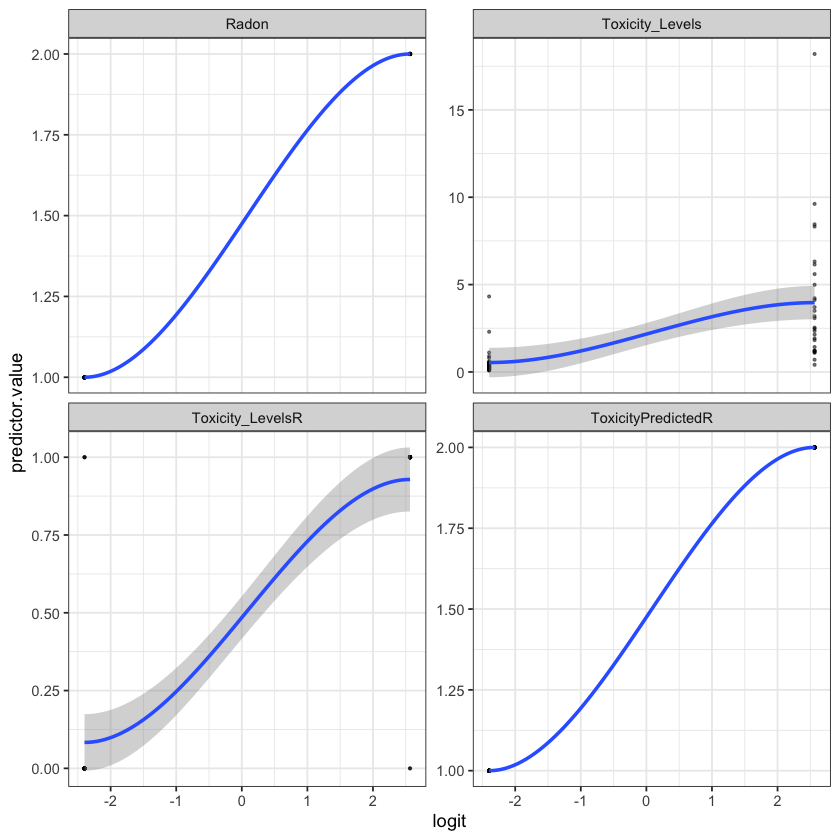

In [37]:
ggplot(Metals2, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### Multicollinearity

The IV's should not be related to each other. In this case, there is only one Independent Variable, Radon, so we can skip this step.

### Independent Errors
We can test for independent error by graphing the residual over the index.

Graphing the Errors:

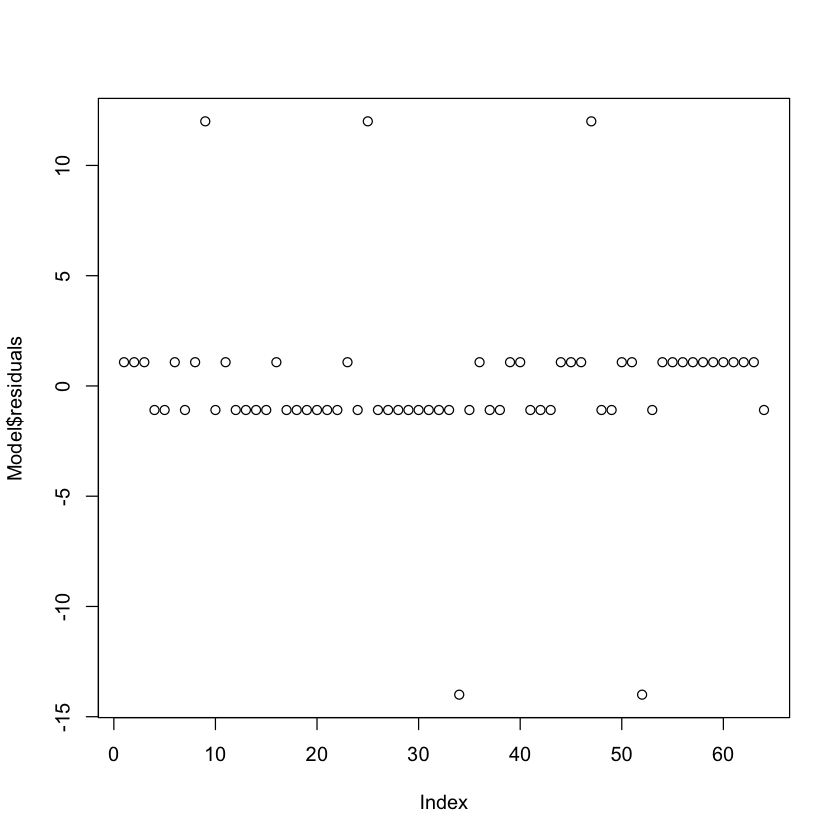

In [40]:
plot(Model$residuals)

We are looking for a pretty even distribution of points all the way across the x axis. 

We can also use the Durbin-Watson test to see whether we have independence of errors.

### Durbin-Watson Test

In [43]:
dwtest(Model, alternative="two.sided")


	Durbin-Watson test

data:  Model
DW = 1.9542, p-value = 0.8259
alternative hypothesis: true autocorrelation is not 0


Using the alternative="two.sided" argument means that we are testing for both positive and negative autocorrelation of errors.

Looking at the output we see the p value is 0.82 which is greater than 0.05 so this is not a significant result:) Remember this is a made up example!

In [71]:
# A very wise man showed me this trick below! If you are learning a code and do not understand something, you can enter
# ? with the code and shift enter. So below the dwtest() function if I enter the ?dwtest and shift enter, a window
# opens with detailed info regarding the Durbin-Watson test! Super helpful!
?dwtest

### Screening for Outliers
To screen for outliers, we will use the influence.measures function used previously:

In [44]:
infl <- influence.measures(Model)
summary(infl)

Potentially influential observations of
	 glm(formula = Toxicity_LevelsR ~ Radon, family = binomial, data = Metals) :

   dfb.1_ dfb.Radn dffit   cov.r   cook.d hat  
9   0.55  -0.35     0.55_*  0.78_*  0.16   0.03
25  0.55  -0.35     0.55_*  0.78_*  0.16   0.03
34  0.00  -0.50    -0.65_*  0.76_*  0.25   0.04
47  0.55  -0.35     0.55_*  0.78_*  0.16   0.03
52  0.00  -0.50    -0.65_*  0.76_*  0.25   0.04


 If dfb.1_ or dffit values are greater than 1, or if hat is greater than .3 or so, there is probably an outlier than should be examined and possibly removed. Looks like this example is ok not seeing that here.

In [45]:
### I hope this example was helpful to you! Most of the wording used is from Lesson 2 page 4 in the LMS. 
### <3 Mia